# 1. Importing Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Data set : Titanic Dataset

In [67]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/titanic-dataset


In [68]:
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
print(df.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## Exploring our dataset

In [69]:
df_original = df.copy()


In [70]:
## Shape of the Dataset
print(f'Shape of dataset: {df.shape}')

#So we have 891 Columns and 12 rows

Shape of dataset: (891, 12)


### Data Types and Null values

In [71]:
# printing column names in our dataset
column = [column_name for column_name, _ in df.items()]
print(f'Column names: {column}')

# Summary of data types and null counts
summary = pd.DataFrame({
    'Data Type': df.dtypes,
    'Null Values': df.isnull().sum()
})
print(summary)


Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
            Data Type  Null Values
PassengerId     int64            0
Survived        int64            0
Pclass          int64            0
Name           object            0
Sex            object            0
Age           float64          177
SibSp           int64            0
Parch           int64            0
Ticket         object            0
Fare          float64            0
Cabin          object          687
Embarked       object            2


We can see that `Age`, `cabin` and `Embarked` have missing values.

In [72]:
### Checking the Skewness to use mean or median for the missing values

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Calculate skewness
skewness = numerical_cols.skew()

print("Skewness of numerical columns:")
print(skewness)


Skewness of numerical columns:
PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64


In [73]:
# 1. Handle numerical columns

# mean if not that much skewed. median if skewed
df['Age'] = df['Age'].fillna(df['Age'].mean()) 


# 2. Handle categorical columns
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Using mode (most frequent)

# 3. Handle 'Cabin' : Highest missing values , we can drop the columns too

df['Cabin'] = df['Cabin'].fillna('Unknown')


In [74]:
# 4. Check again
print("\nMissing values after handling:")
print(df.isnull().sum())
print(df.head(5))


Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  
0      0       

#### as we can see above tha we dont have any `N/A` vakue lets go further and explore more 

## Droping some features:
* Because these will not be useful for classification

In [75]:
# Drop 'Name', 'Ticket', and 'Cabin' columns
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
print(df.head(5))
print(df['Embarked'].unique())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S
['S' 'C' 'Q']


## Encoding
* we will do the label Encoding:
  * Because `Sex` and `Embarked ` both have only two values

In [76]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['Sex', 'Embarked']:
  df[col] = le.fit_transform(df[col])


In [77]:
print(df.head(5))
# Lets see the summary now
summary = pd.DataFrame({
    'Data Type': df.dtypes,
    'Null Values': df.isnull().sum()
})
print(summary)

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         2
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         2
3            4         1       1    0  35.0      1      0  53.1000         2
4            5         0       3    1  35.0      0      0   8.0500         2
            Data Type  Null Values
PassengerId     int64            0
Survived        int64            0
Pclass          int64            0
Sex             int64            0
Age           float64            0
SibSp           int64            0
Parch           int64            0
Fare          float64            0
Embarked        int64            0


From Above we can see that all our data is now numerical based.

In [78]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df.head(7))


   PassengerId  Survived    Pclass       Sex       Age     SibSp     Parch  \
0    -1.730108 -0.789272  0.827377  0.737695 -0.592481  0.432793 -0.473674   
1    -1.726220  1.266990 -1.566107 -1.355574  0.638789  0.432793 -0.473674   
2    -1.722332  1.266990  0.827377 -1.355574 -0.284663 -0.474545 -0.473674   
3    -1.718444  1.266990 -1.566107 -1.355574  0.407926  0.432793 -0.473674   
4    -1.714556 -0.789272  0.827377  0.737695  0.407926 -0.474545 -0.473674   
5    -1.710669 -0.789272  0.827377  0.737695  0.000000 -0.474545 -0.473674   
6    -1.706781 -0.789272 -1.566107  0.737695  1.870059 -0.474545 -0.473674   

       Fare  Embarked  
0 -0.502445  0.585954  
1  0.786845 -1.942303  
2 -0.488854  0.585954  
3  0.420730  0.585954  
4 -0.486337  0.585954  
5 -0.478116 -0.678175  
6  0.395814  0.585954  


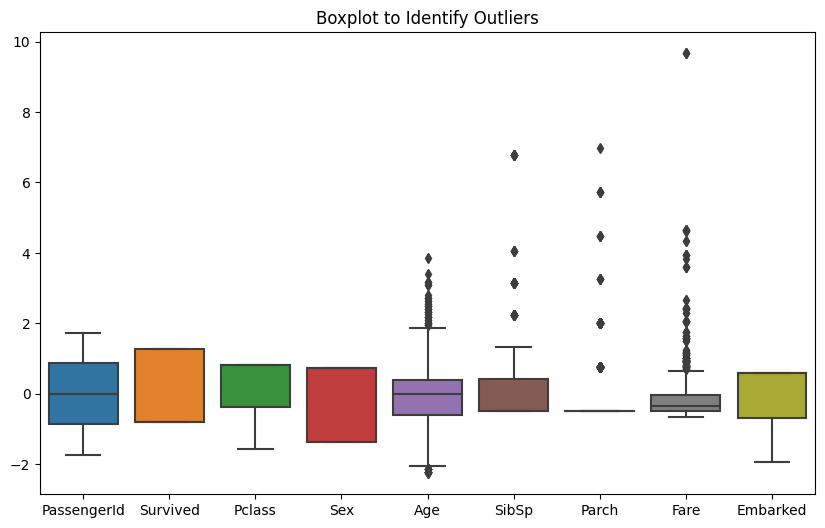

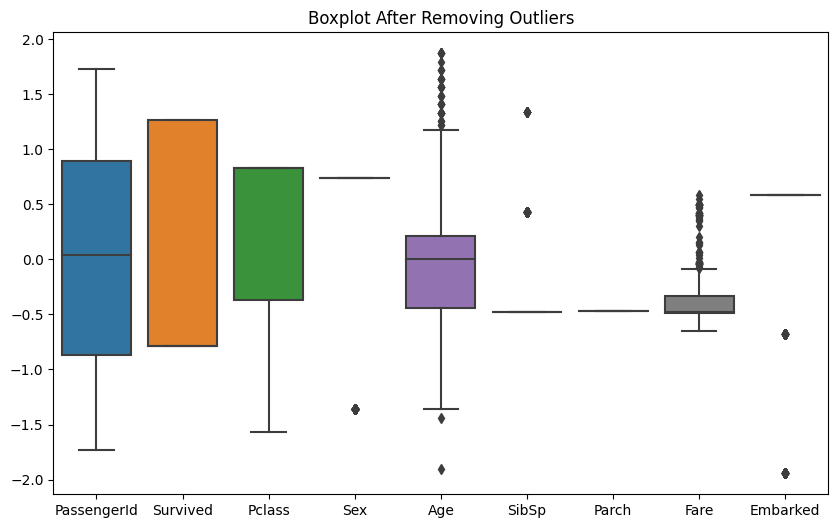

In [79]:




# Sample DataFrame (replace with your dataset)
# df = pd.read_csv("your_data.csv")

# Create a larger figure
plt.figure(figsize=(10, 6))  # Adjusting the figure size

# Visualizing the boxplot
sns.boxplot(data=df)  # Replace 'df' with the column you're interested in
plt.title('Boxplot to Identify Outliers')
plt.show()

# Calculate Q1, Q3, and IQR for outlier removal
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the outlier threshold
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df >= lower_bound) & (df <= upper_bound)].dropna()

# Create a larger figure again
plt.figure(figsize=(10, 6))  # Adjusting the figure size

# Visualizing the cleaned data
sns.boxplot(data=df_cleaned)  # This will show the data without outliers
plt.title('Boxplot After Removing Outliers')
plt.show()


In [80]:
print(df.head(5))

   PassengerId  Survived    Pclass       Sex       Age     SibSp     Parch  \
0    -1.730108 -0.789272  0.827377  0.737695 -0.592481  0.432793 -0.473674   
1    -1.726220  1.266990 -1.566107 -1.355574  0.638789  0.432793 -0.473674   
2    -1.722332  1.266990  0.827377 -1.355574 -0.284663 -0.474545 -0.473674   
3    -1.718444  1.266990 -1.566107 -1.355574  0.407926  0.432793 -0.473674   
4    -1.714556 -0.789272  0.827377  0.737695  0.407926 -0.474545 -0.473674   

       Fare  Embarked  
0 -0.502445  0.585954  
1  0.786845 -1.942303  
2 -0.488854  0.585954  
3  0.420730  0.585954  
4 -0.486337  0.585954  


# Exploratort Data Analysis

In [82]:
print(df_original.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## Histogram

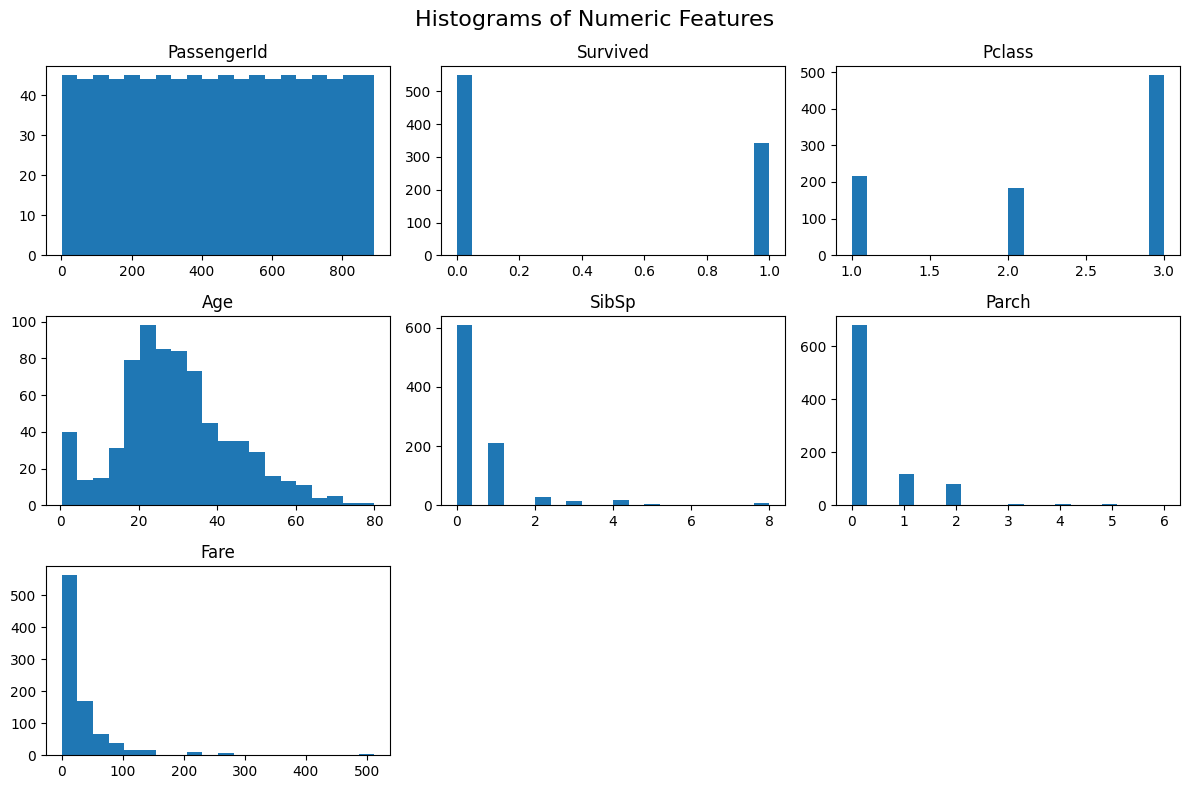

In [83]:
df_original.hist(bins=20, figsize=(12, 8), grid=False)
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

## Box Plot

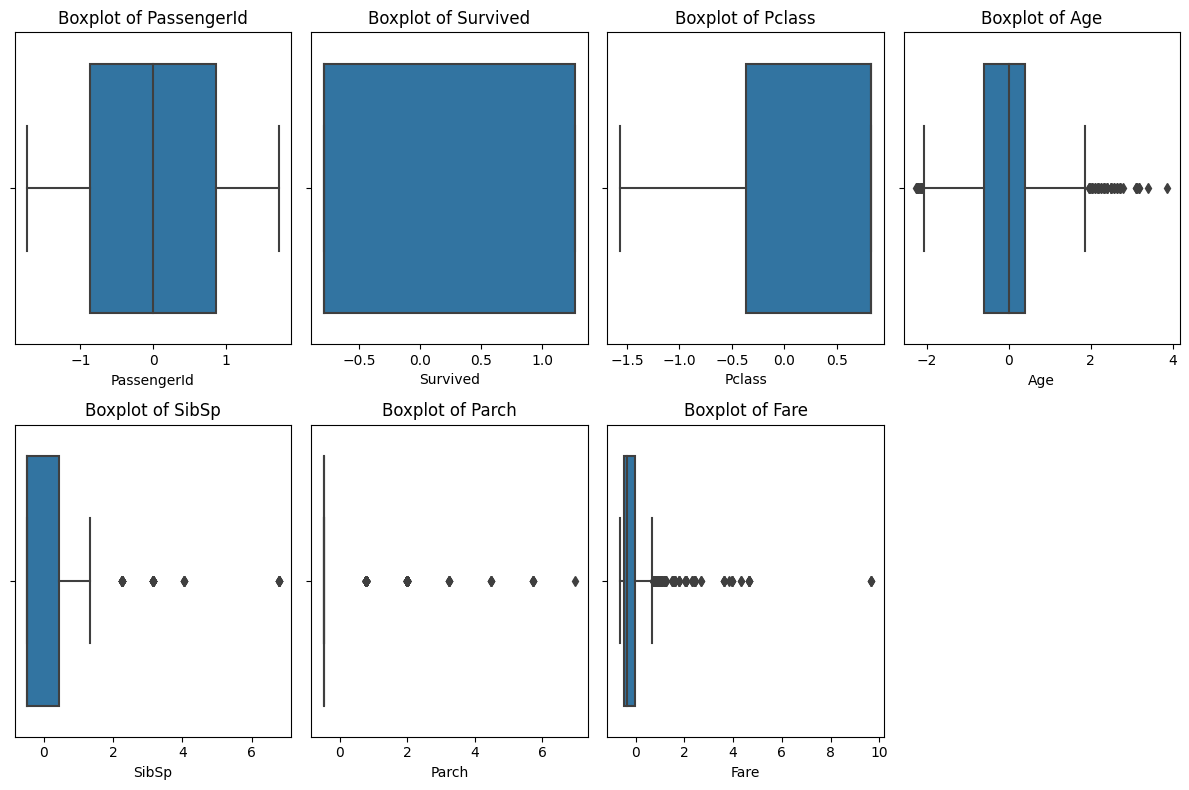

In [84]:
numeric_cols = df_original.select_dtypes(include=['int64', 'float64']).columns

# Boxplots for each numeric column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, (len(numeric_cols)+1)//2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()


here from box plot we can see that for `SibSp` , `Parch`, `Fare` have out liers

## Correlation Matrix + Heatmap

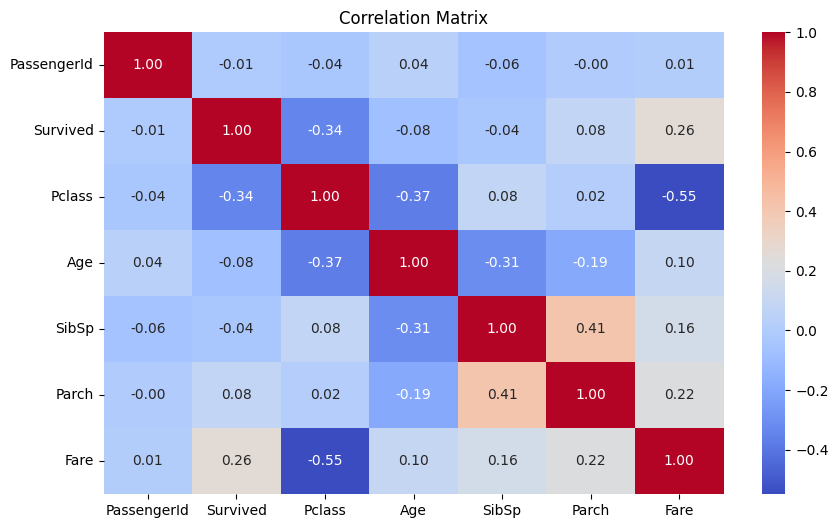

In [85]:
# correlation matrix
corr = df_original.corr(numeric_only=True)


plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


 # Pairplot (for pairwise relationships and distributions)

In [95]:
# Replace inf/-inf with NaN
df_original.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaNs (only if necessary for plotting)
df_cleaned = df_original.dropna()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

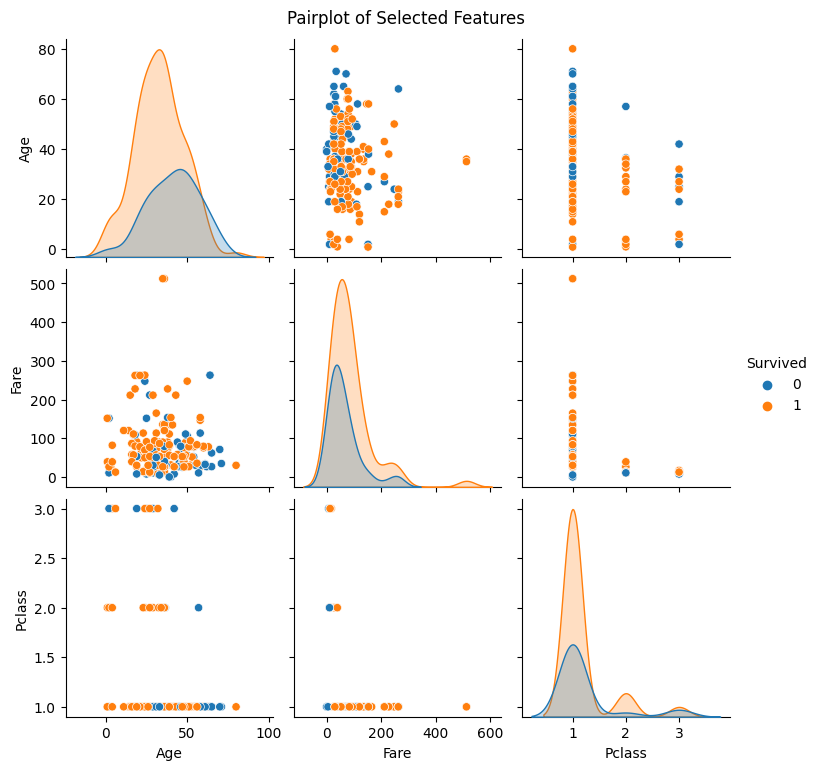

In [96]:
# Choose a subset of relevant numeric columns
subset = ['Survived', 'Age', 'Fare', 'Pclass']  # You can customize this


# Plot pairplot
sns.pairplot(df_cleaned[subset], hue='Survived')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


## Identify patterns, trends, or anomalies in the data

In [97]:
print(df_original.groupby('Pclass')['Survived'].mean())    # Survival by class
print(df_original.groupby('Sex')['Survived'].mean())       # Survival by gender
print(df_original.groupby('Embarked')['Survived'].mean())  # Survival by port


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


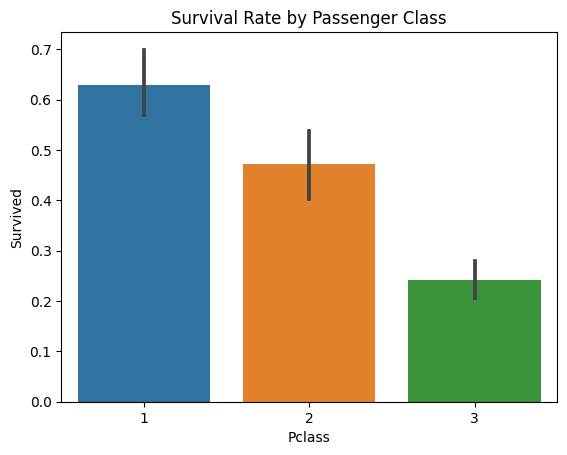

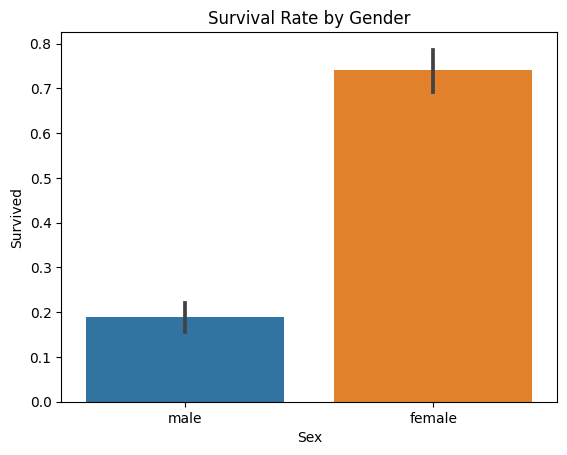

In [98]:
sns.barplot(x='Pclass', y='Survived', data=df_original)
plt.title('Survival Rate by Passenger Class')
plt.show()

sns.barplot(x='Sex', y='Survived', data=df_original)
plt.title('Survival Rate by Gender')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


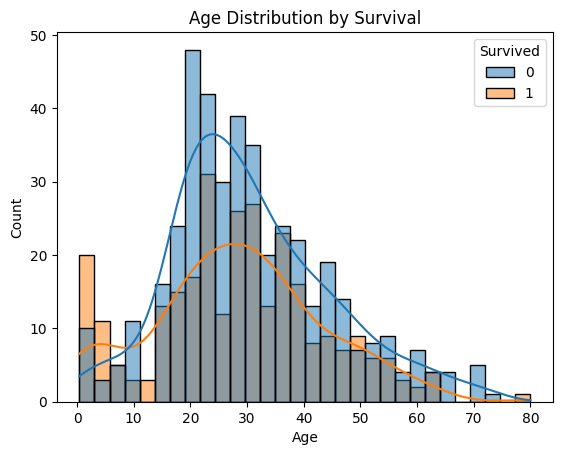

In [99]:
sns.histplot(data=df_original, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Age Distribution by Survival')
plt.show()


In [100]:
print(df_original[['Age', 'Fare']].describe())  # Look at min, max, percentiles


              Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


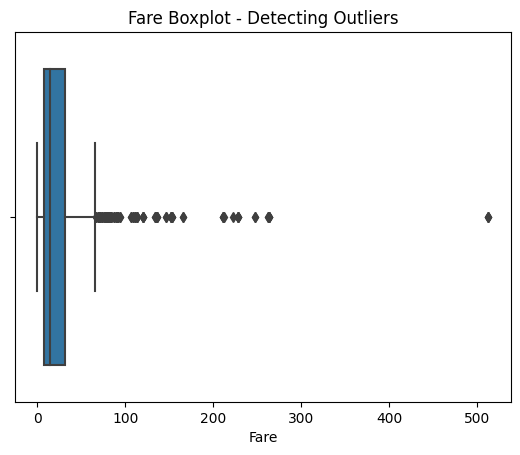

In [101]:
sns.boxplot(x=df_original['Fare'])
plt.title('Fare Boxplot - Detecting Outliers')
plt.show()


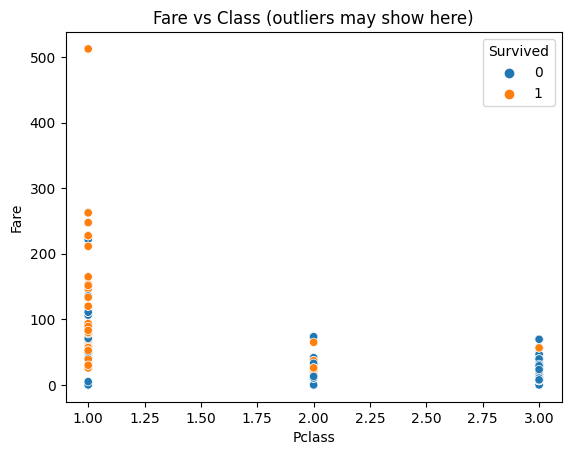

In [102]:
sns.scatterplot(x='Pclass', y='Fare', data=df_original, hue='Survived')
plt.title("Fare vs Class (outliers may show here)")
plt.show()


# Feature-Level Inferences

- **Pclass vs Survived:**  
  Higher class passengers (Pclass = 1) had a significantly higher survival rate compared to lower classes. This suggests first-class passengers were prioritized during evacuation.

- **Age Distribution:**  
  Most passengers were young adults (aged 20–40 years). The distribution was slightly right-skewed, meaning more younger passengers. Age could have impacted survival chances.

- **Sex vs Survived:**  
  Females had a notably higher survival rate than males, supporting the "Women and Children First" policy used during rescue.

- **Fare Distribution:**  
  Fare distribution was highly skewed, with some passengers paying very high fares. Higher fares were linked to higher passenger classes, implying wealthier passengers had better chances of survival.

- **Embarked Location:**  
  Most passengers boarded at Southampton ('S'). It's worth exploring if embarkation point influenced survival rates.

- **Feature Correlations:**
  - Positive correlation between Fare and Pclass (higher fare → higher class).
  - Slight negative correlation between Age and Survived (younger passengers had slightly better survival odds).

---

## Summary Table

| Feature  | Insight | Possible Reason |
|----------|---------|-----------------|
| Pclass   | Higher class = Higher survival | Priority during evacuation |
| Sex      | Females survived more | "Women first" policy |
| Age      | Younger passengers had advantage | Priority to children, physical agility |
| Fare     | Higher fare linked to higher survival | Socioeconomic status impact |
| Embarked | Majority boarded at Southampton | Main departure port |
